# SVM

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

mpl.rcParams['axes.labelsize'] = 15

# Fashion MNIST Image Classification
The `Fashion-MNIST` dataset is a drop-in replacement for the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each example in the dataset is a 28x28 grayscale image of various clothing and accesories. There are 60,000 training examples and 10,000 iamges for testing. Each image falls into one of the following 10 categories.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Dataset:

| Name  | Content | Examples | Size | Link | MD5 Checksum|
| --- | --- |--- | --- |--- |--- |
| `train-images-idx3-ubyte.gz`  | training set images  | 60,000|26 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|`8d4fb7e6c68d591d4c3dfef9ec88bf0d`|
| `train-labels-idx1-ubyte.gz`  | training set labels  |60,000|29 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|`25c81989df183df01b3e8a0aad5dffbe`|
| `t10k-images-idx3-ubyte.gz`  | test set images  | 10,000|4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|`bef4ecab320f06d8554ea6380940ec79`|
| `t10k-labels-idx1-ubyte.gz`  | test set labels  | 10,000| 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|`bb300cfdad3c16e7a12a480ee83cd310`|

To load the dataset into your numpy array, use the following `load_mnist()` function, provided by the owners of the dataset.

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

label = ['T-shirt/top',  'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
         'Sneaker', 'Bag', 'Ankle boot']

In [3]:
data_dir = './'
X_train, y_train = load_mnist(data_dir, kind='train')
X_test, y_test = load_mnist(data_dir, kind='t10k')

X_train = X_train.astype(np.float32) / 256.0
X_test = X_test.astype(np.float32) / 256.0

print("The training dataset is a {}x{} matrix.".format(X_train.shape[0], X_train.shape[1]))
print("The test dataset contains {} examples.".format(len(y_test)))

The training dataset is a 60000x784 matrix.
The test dataset contains 10000 examples.


In [5]:
def display_example(image_idx):
    """
    display an example in the dataset as an image.
    
    Parameters:
    ----------------------
    image_idx: int, the (row) index of image in the training data matrix.
               Hence, it ranges from 0 to 59,999.
    """

    fig= plt.figure(figsize=(2,2))
    a=np.reshape(X_train[image_idx],(28,28))
    plt.figure(figsize=(2,2))
    plt.title(label[image_idx+1])
    plt.axis('off')
    imgplot = plt.imshow(a,cmap='gray')

<Figure size 144x144 with 0 Axes>

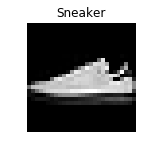

In [289]:
display_example(6)

In [293]:
X_train.shape

(60000, 784)

In [45]:
from collections import Counter

class KNNClassifier(object):
    """ A naive implementation of k-NN model """
    def __init__(self, k=1):
        """
        The construct of k-NN class.
        
        Parameters:
        ----------------------
        k: int, the number of neighbors to consider
        """
        self.k = k
        self.train_X = None
        self.train_y = None
        
    def fit(self, X, y):   
        """ training the model. 
        """
        self.train_X = X
        self.train_y = y
        
    def predict(self, test_X):
        """
        Performs the classification according to k-NN algorithm.
        
        Parameters:
        -------------------
        X_test: 2D array, a set of query points
        
        Returns:
        -------------------
        y_test: 1D array, the predicted class label for each example in X_test
        """        
        if self.train_X is None or self.train_y is None:
            raise Exception('k-NN is not initialized. Use after calling fit().')
            
        n_test = test_X.shape[0]
        n_train = self.train_X.shape[0]
        
        # pairwise distance matrix of shape (n_test, n_train)

         
        a=self.train_X**2
        
        b=test_X**2
        
        c=-2*(test_X * self.train_X.T)
        
        dist = a+b+c
        
        return self.majority_voting(dist)
        
    def majority_voting(self, dist):
        """
        Given the pairwise distance, this function performs the majority voting and 
        returns a 1D array of predicted labels.
        
        Parameters:
        ----------------------
        dist: 2D array of shape (n_test, n_train), pairwise distance matrix 
        
        Returns:
        y_pred: array of predicted lable for each example in X_test
        """
        y_pred=[]
        #--------------------------------------#
        #   Your code goes here                #
        #--------------------------------------#
        for i in range(dist.shape[0]):
            row=dist[i]
            sortrow=np.sort(row)
            label=[]
            for j in range(k):
                ind = np.where(row==sort[i])
                label.append(train_y[ind])
            label=Counter(label)
            y_pred.appened(label.most_common(1)[0][0])
        
        return np.array(y_pred)
        
        

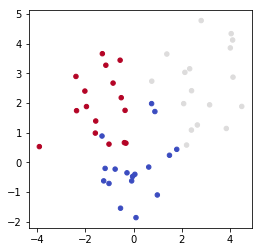

In [30]:
from sklearn.datasets import make_blobs


X_toy, y_toy = make_blobs(n_samples=50, n_features=2, centers=[[0, 0], [3, 3], [-1, 1.5]],
                          random_state=3)

# (min, max) coordinate values for drawing a countour plot
x_min, x_max = X_toy[:, 0].min()-1, X_toy[:, 0].max()+1
y_min, y_max = X_toy[:, 1].min()-1, X_toy[:, 1].max()+1


def draw2D_data(X, Y):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(X[:, 0], X[:, 1], s=20, c=Y, cmap=plt.cm.coolwarm)
    
    return ax

draw2D_data(X_toy, y_toy)


In [42]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [43]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [48]:
model=KNNClassifier()
model.fit(X_train,y_train)

In [47]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [52]:
fig, sub = plt.subplots(2, 2)
ax=sub.flatten()
plot_contours(ax, model, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred,y_test)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train[:500], y_train[:500])

#-------------------------------------#
#    Your code goes here              #  
#-------------------------------------#


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
y_pred=neigh.predict(X_test[:100])

In [25]:
correct=0
y=y_test[:100]
for i in range(len(y_pred)):
    if y_pred[i]==y[i]:
        correct=correct+1
correct=(correct/100)
correct

0.79

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train[:500],y_train[:500])
#-------------------------------------#
#    Your code goes here              #  
#-------------------------------------#


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred=clf.predict(X_test[:100])

In [26]:
y=y[:100]
correct=0
y=y_test[:100]
for i in range(len(y_pred)):
    if y_pred[i]==y[i]:
        correct=correct+1
correct=(correct/100)
correct

0.79

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  5,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  2,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  4]], dtype=int64)

# Eigenface



In [29]:
from sklearn.datasets import fetch_lfw_people


lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
n_samples, height, width = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

n_classes = target_names.shape[0]
n_features = X.shape[1]
print("Total dataset size:")
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

Total dataset size:
n_samples: 3023
n_features: 2914
n_classes: 62


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1220)

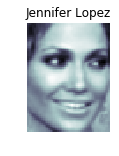

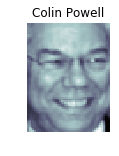

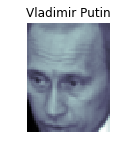

In [31]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(0,3):
    a=np.reshape(X_train[i],(height,width))
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(a,cmap='bone')
    plt.title(target_names[y_train[i]])

## Principal Component Analysis


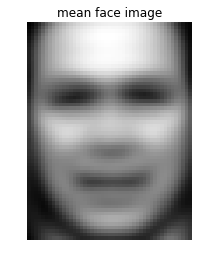

In [32]:
x_mean = np.mean(X_train, axis=0)


def display_face(x, height, width, name):
    """
    This function reshapes the given image and then displays it.
    
    Parameters 
    -------------------
    x: input image vector, 1D numpy array
    height, width: integers, height and width of images
    name: title of the figure
    """
    #-----------------------------------#
    #      your code goes here          #
    #-----------------------------------#
    
    a=np.reshape(x,(height,width))
#     plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(a,cmap='gray')
    plt.title(name)

display_face(x_mean, height, width, 'mean face image')

In [33]:
X_centered = X_train - x_mean

 
def compute_SVD(X_centered):
    """
    This function performs SVD and returns singular values and eigenvectors.
    
    Returns:
    S: 1D numpy array of singular values
    V: a set of eigenvectors, 2D numpy array
    """
    #-----------------------------------#
    #      your code goes here          #
    #-----------------------------------#    
    u,S,V=np.linalg.svd(X_centered)
    return S, V
S, V = compute_SVD(X_centered)

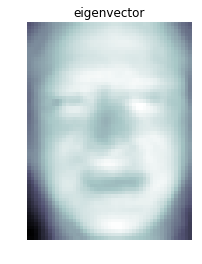

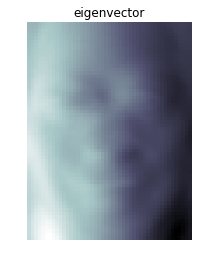

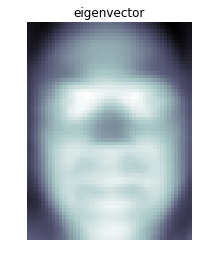

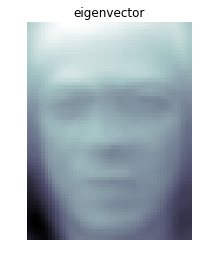

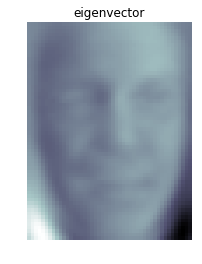

In [34]:
n_disp = 5
for i in range(n_disp):
    a=np.reshape(V[i],(height,width))
    plt.figure()
    plt.title('eigenvector')
    plt.imshow(a,cmap='bone')
    plt.axis('off')

In [35]:
S_std=S/np.sum(S)
cum_exp=np.cumsum(S_std)

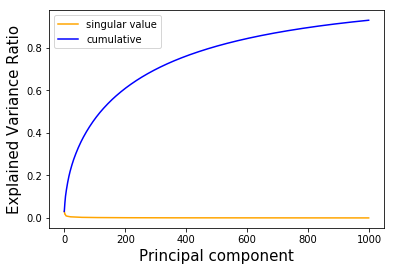

In [36]:
plt.plot(range(1000),S_std[:1000], color='orange', label='singular value')
plt.plot(range(1000),cum_exp[:1000], color='blue', label='cumulative')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance Ratio')
plt.legend()

In [37]:
def get_projected_coordinate(X_centered, V, n_eigv):
    """
    Parameters
    ---------------
    X_centered : original (centered) image, 1D nunmpy array of lenght 2914
    V : set of eigenvectors
    n_eigv: number of eigenvectors to choose
    
    
    Return 
    ------------------
    coord: 1D numpy array of length n_eigv
    """

    #-----------------------------------#
    #      your code goes here          #
    #-----------------------------------#
#     V=V[:n_eigv]
    VT=V.T
    a=0
    coord=np.zeros((n_eigv,len(V[0])))
    #print(coord.shape)
    for i in range(0,n_eigv):
        a=i
        #coord[i]=np.dot(VT[i],X_centered[i])
        #print(VT[i].shape)
        #print(X_centered[i].shape)
        coord[i]=np.dot(V[i],X_centered)
    print(a)
#     coord=np.array(coord)
    return coord

In [38]:
def reconstruct_image(x_mean, V, coord):
    """
    Parameters
    ----------------------
    x_mean: the mean image
    V: the set of eigenvectors
    coord: coordinate values in the projected space, 1D numpy array
    """
    recon=x_mean
    for i in range(len(coord)):
        recon+=coord[i]*V[i]    
    #-----------------------------------#
    #      your code goes here          #
    #-----------------------------------#
    
    return recon

99


Text(0.5,1,'New')

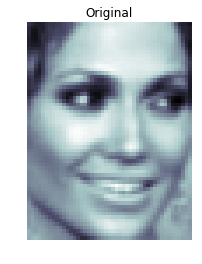

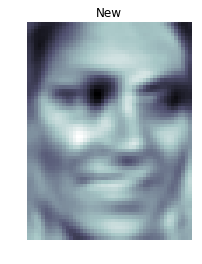

In [40]:
coord=get_projected_coordinate(X_centered[0], V, 100)

img=reconstruct_image(x_mean,V[:100],coord)
image=np.reshape(X_train[0],(height,width))
plt.figure()
plt.axis('off')
plt.imshow(image,cmap='bone')
plt.title("Original")

image=np.reshape(img,(height,width))
plt.figure()
plt.axis('off')
plt.imshow(image,cmap='bone')
plt.title("New")


999


Text(0.5,1,'New')

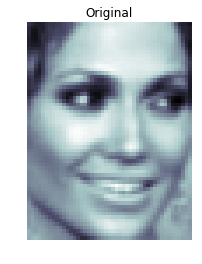

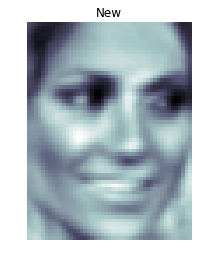

In [41]:
coordi=get_projected_coordinate(X_centered[0], V, 1000)

imgi=reconstruct_image(x_mean,V[:1000],coordi)
image=np.reshape(X_train[0],(height,width))
plt.figure()
plt.axis('off')
plt.imshow(image,cmap='bone')
plt.title("Original")

image=np.reshape(imgi,(height,width))
plt.figure()
plt.axis('off')
plt.imshow(image,cmap='bone')
plt.title("New")